In [1]:
#!/usr/bin/env python
# coding: utf-8

import numpy as np
import matplotlib.pyplot as plt
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging
from pykrige.uk import UniversalKriging
import pandas as pd
from mpl_toolkits.basemap import Basemap

In [121]:
df = pd.read_excel(u'C:\\Users\\Wang\\Desktop\\PythonTest\\interpolate\\dataP\\234_rankP_avg改1368值.xlsx')
#檔案欄位名稱
df.head()

,lon,lat,ID,1368,1369,1370,1371,1372,1373,1374,...,1905,1906,1907,1908,1909,1910,1911,1912,(空白),總計
0,121.494508,31.339228,11000,-2,0.0,0.0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.100806
1,121.636161,31.230935,11001,-2,0.0,0.0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.133333
2,121.549837,30.915938,11002,-2,0.0,0.0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,-0.164179
3,121.212828,31.011963,11003,-2,0.0,0.0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.242604
4,121.231712,30.833118,11004,-2,0.0,0.0,0,0,0,0,...,0.555556,0.0,0.2,0.0,0.0,0.0,0.5,0,0,0.397059


In [122]:
LON = df[u'lon'].values
LAT = df[u'lat'].values
#RANKP = df[u'rankP'].values
RANKP = df.iloc[:,3]
RANKP
#LON = LON.astype('float64')
#LAT = LAT.astype('float64')
#RANKP = RANKP.astype('float64')

0      -2
1      -2
2      -2
3      -2
4      -2
5      -2
6      -2
7      -2
8      -2
9      -2
10     -2
11     -2
12     -2
13     -2
14     -2
15     -2
16     -2
17     -2
18     -2
19     -2
20     -2
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1535   -2
1536   -2
1537   -2
1538   -2
1539   -2
1540   -2
1541   -2
1542   -2
1543   -2
1544   -2
1545   -2
1546   -2
1547   -2
1548   -2
1549   -2
1550   -2
1551   -2
1552   -2
1553   -2
1554   -2
1555   -2
1556   -2
1557   -2
1558   -2
1559   -2
1560   -2
1561   -2
1562   -2
1563   -2
1564    0
Name: 1368, Length: 1565, dtype: int64

Plotting Enabled

Initializing variogram model...
Coordinates type: 'geographic' 

Using 'spherical' Variogram Model
Partial Sill: 2.80097786324
Full Sill: 2.89514379781
Range: 15.3484467314
Nugget: 0.0941659345709 



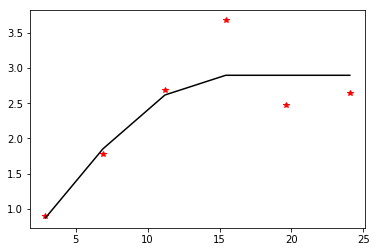

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



In [140]:
#要內插的點
#gridx, gridy = np.mgrid[108:126, 20:44]
gridx = np.arange(98.0, 126.0, 1.0)
gridy = np.arange(17.0, 45.0, 1.0)
# Create the ordinary kriging object. Required inputs are the X-coordinates of
# the data points, the Y-coordinates of the data points, and the Z-values of the
# data points. If no variogram model is specified, defaults to a linear variogram
# model. If no variogram model parameters are specified, then the code automatically
# calculates the parameters by fitting the variogram model to the binned
# experimental semivariogram. The verbose kwarg controls code talk-back, and
# the enable_plotting kwarg controls the display of the semivariogram.
OK = OrdinaryKriging(LON, LAT, RANKP, variogram_model='spherical', coordinates_type='geographic',
                     verbose=True, enable_plotting=True)

#OK = OrdinaryKriging(LON, LAT, RANKP, variogram_model='linear',
#verbose=True, enable_plotting=True)
# Creates the kriged grid and the variance grid. Allows for kriging on a rectangular
# grid of points, on a masked rectangular grid of points, or with arbitrary points.
# (See OrdinaryKriging.__doc__ for more information.)
z, ss = OK.execute('grid', gridx, gridy)
# Writes the kriged grid to an ASCII grid file.
#kt.write_asc_grid(gridx, gridy, z, filename="output.asc")


In [141]:
%matplotlib inline

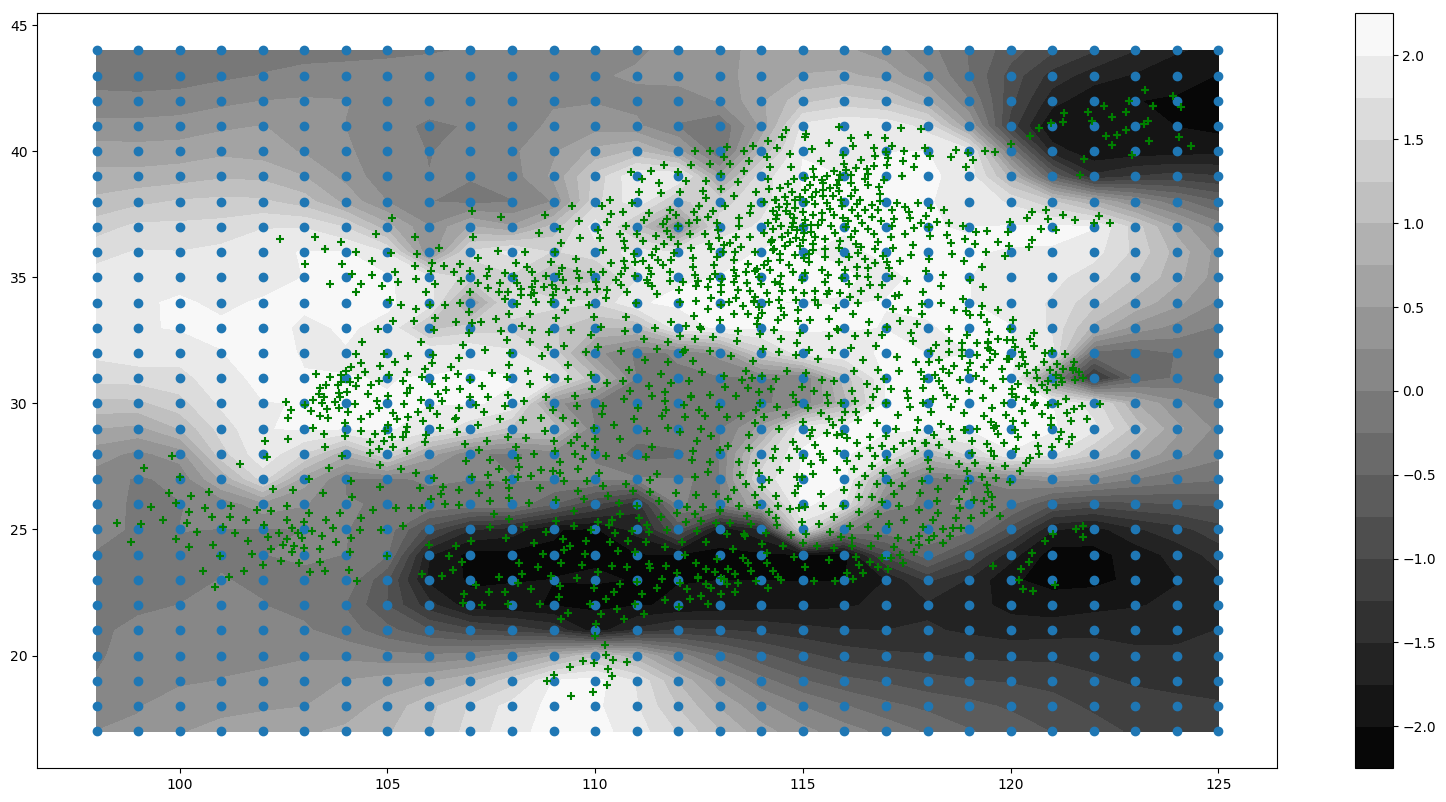

In [142]:
fig = plt.figure(figsize=(20,10),dpi=100)
X, Y = np.meshgrid(gridx, gridy)
Z = z
#plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.contourf(X, Y, Z, 20, cmap='gray')
plt.colorbar()
plt.scatter(X,Y)
plt.scatter(LON, LAT, c='green', marker='+')

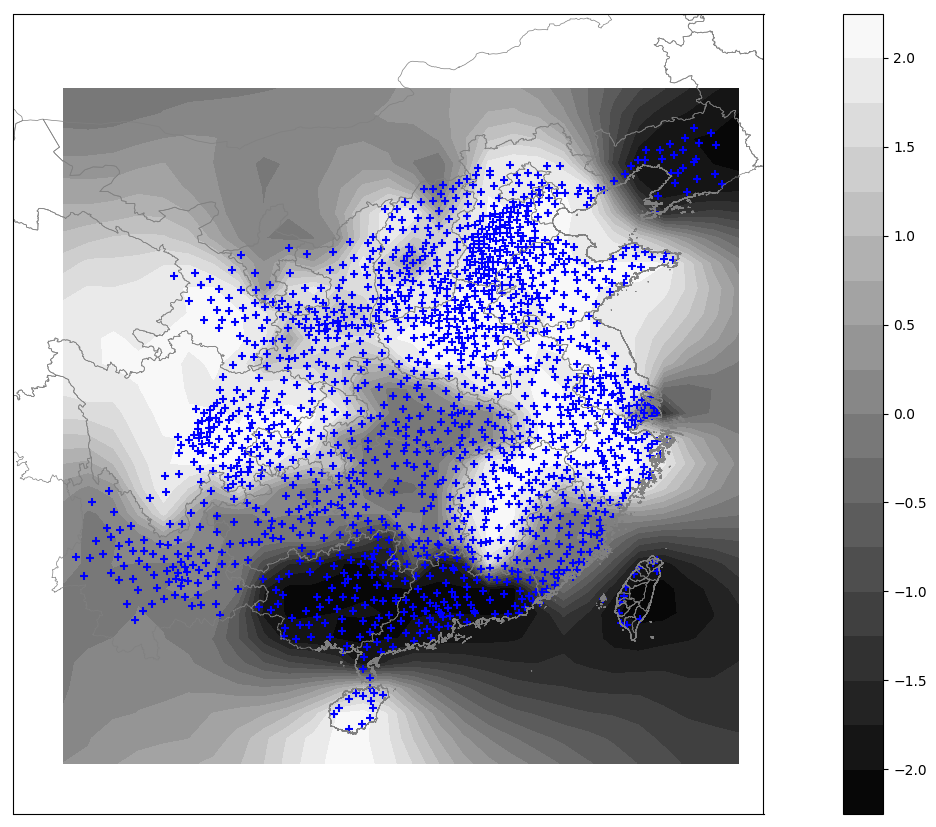

In [146]:
fig = plt.figure(figsize=(20,10),dpi=100)
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax1 = fig.add_axes([left, bottom, width, height])
ax1.m = Basemap(llcrnrlon=96, llcrnrlat=15, urcrnrlon=126, urcrnrlat=47, projection='cyl', lat_1=20, lat_2=35, lon_0=110,resolution='h')
#ax1.m = Basemap(llcrnrlon=115, llcrnrlat=20, urcrnrlon=125, urcrnrlat=27, projection='cyl', lat_1=20, lat_2=35, lon_0=120,resolution='h')
#ax1.m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\TWN_adm_shp\TWN_adm0', 'taiwan', drawbounds=True, color='black')
ax1.m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\CHN_adm_shp\CHN_adm1', 'states', drawbounds=True, color='grey')
ax1.m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\TWN_adm_shp\TWN_adm1', 'taiwan', drawbounds=True, color='grey')
ax1.m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\TWN_adm_shp\TWN_adm2', 'taiwan', drawbounds=True, color='grey')

X, Y = np.meshgrid(gridx, gridy)
Z = z
plt.contourf(X, Y, Z, 20, cmap='gray')
#plt.contourf(X, Y, Z, 20, cmap='RdGy')
#plt.contourf(X, Y, Z, 20, cmap='Paired')
plt.colorbar()
#plt.scatter(X,Y)
plt.scatter(LON, LAT, c='b', marker='+')